In [1]:
!pip install konlpy
!pip install wordcloud

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


#import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from bokeh.plotting import figure
import random
from konlpy.tag import Komoran
tagger = Komoran()
from collections import Counter
from wordcloud import WordCloud
import networkx as nx
import re
import math

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 d

In [2]:
from importlib import reload
plt=reload(plt)

plt.rcParams["font.family"] = 'NanumGothic'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
with open('/content/drive/MyDrive/data_journalism/movie_df.xlsx',mode="rb") as excel_file:
    DF = pd.read_excel(excel_file)

In [5]:
DF

title  year  audience                 date        genre  \
0                  범죄도시 2  2022  12693023  2022-05-18 00:00:00       범죄, 액션   
1                 탑건: 매버릭  2022   8171923  2022-06-22 00:00:00           액션   
2               한산: 용의 출현  2022   7262885  2022-07-27 00:00:00      액션, 드라마   
3              공조2: 인터내셔날  2022   6948819  2022-09-07 00:00:00      액션, 코미디   
4     닥터 스트레인지: 대혼돈의 멀티버스  2022   5884600  2022-05-04 00:00:00  액션, 판타지, 모험   
...                   ...   ...       ...                  ...          ...   
4291               무림 악인전  1980     20342  1980-04-10 00:00:00           액션   
4292                   복권  1980     20307  1980-06-21 00:00:00          NaN   
4293             바다로 간 목마  1980     20041  1980-10-18 00:00:00          NaN   
4294           최인호의 병태 만세  1980     18332  1980-12-12 00:00:00          NaN   
4295                해뜨는 집  1980     17987  1980-12-06 00:00:00          NaN   

                                                  actor country  \
0           마동석(마석도), 손석구(강해상), 최귀화(전일만), 마동석, 손석구, 최귀화    대한민국   
1     톰 크루즈(매버릭), 마일즈 텔러(루스터), 제니퍼 코넬리(페니), 톰 크루즈, 마...      미국   
2     박해일(이순신), 변요한(와키자카 야스하루), 안성기(어영담), 박해일, 변요한, 안성기    대한민국   
3               현빈(림철령), 유해진(강진태), 윤아(박민영), 현빈, 유해진, 윤아    대한민국   
4     베네딕트 컴버배치(닥터 스트레인지), 엘리자베스 올슨(완다 막시모프 / 스칼렛 위치...      미국   
...                                                 ...     ...   
4291                       정진화, 서영란, 장일식, 정진화, 서영란, 장일식    대한민국   
4292                       정진화, 김명아, 김기주, 정진화, 김명아, 김기주    대한민국   
4293                                 장미희, 윤일봉, 장미희, 윤일봉    대한민국   
4294                       엄인태, 이미영, 정한용, 엄인태, 이미영, 정한용    대한민국   
4295                       강주희, 이승현, 김정훈, 강주희, 이승현, 김정훈    대한민국   

              director      age  score  \
0             이상용, 이상용  15세 관람가   9.32   
1     조셉 코신스키, 조셉 코신스키  12세 관람가   9.76   
2             김한민, 김한민  12세 관람가   8.75   
3             이석훈, 이석훈  15세 관람가   8.44   
4         샘 레이미, 샘 레이미  12세 관람가   7.22   
...                ...      ...    ...   
4291      김정용, 김정용, 신고      NaN   7.00   
4292          김정용, 김정용  12세 관람가   0.00   
4293      정진우, 정진우, 신고  12세 관람가   6.29   
4294          김수형, 김수형  12세 관람가   0.00   
4295      석래명, 석래명, 신고   전체 관람가   9.44   

                                               synopsis  
0     ['가리봉동 소탕작전 후 4년 뒤,금천서 강력반은 베트남으로 도주한 용의자를 인도받...  
1     ['최고의 파일럿이자 전설적인 인물 매버릭(톰 크루즈)은 자신이 졸업한 훈련학교 교...  
2     ['1592년 4월, 조선은 임진왜란 발발 후 단 15일 만에 왜군에 한양을 빼앗기...  
3     ['공조 이즈 백! 이번엔 삼각 공조다!남한으로 숨어든 글로벌 범죄 조직을 잡기 위...  
4     ['끝없이 균열되는 차원과 뒤엉킨 시공간의 멀티버스가 열리며오랜 동료들, 그리고 차...  
...                                                 ...  
4291  ['고구려가 요동땅을 다스릴때 막대한 황금엽전을 그곳에 매장한다. 고려왕조가 기울어...  
4292  ['이대복은 신체조건이 맞지않아 공초대사로부터 다른길을 가라는 가르침을 받고 하산한...  
4293  ['여대생 주희(장미희 분)는 11년 연상의 농아학교 교사 이민우(윤일봉 분)를 사...  
4294  ['신학기가 시작되자 철학과 강의실에 편입생 순철이 들어오므로 병태와 친숙해진다. ...  
4295  ['영아는 말괄량이로 엄마와 둘이 살아간다. 영아는 친구들과 어울려 미팅장소엘 갔다...  

[4296 rows x 11 columns]

In [6]:
DF.columns = ['title','year','audience','date','genre','actor','country','director','age','score','synopsis']
DF["title"]=DF["title"].apply(str)
DF["genre"]=DF["genre"].apply(str)
DF["actor"]=DF["actor"].apply(str)
DF["director"]=DF["director"].apply(str)
DF["age"] = DF["age"].apply(str)

In [7]:
DF['genre']=DF['genre'].replace(["멜로"],'로맨스')

In [8]:
DF[DF['year']==2022]

title  year  audience                 date         genre  \
0                범죄도시 2  2022  12693023  2022-05-18 00:00:00        범죄, 액션   
1               탑건: 매버릭  2022   8171923  2022-06-22 00:00:00            액션   
2             한산: 용의 출현  2022   7262885  2022-07-27 00:00:00       액션, 드라마   
3            공조2: 인터내셔날  2022   6948819  2022-09-07 00:00:00       액션, 코미디   
4   닥터 스트레인지: 대혼돈의 멀티버스  2022   5884600  2022-05-04 00:00:00   액션, 판타지, 모험   
..                  ...   ...       ...                  ...           ...   
95              어나더 라운드  2022     36126  2022-01-19 00:00:00           드라마   
96            배니싱: 미제사건  2022     35164  2022-03-30 00:00:00       범죄, 스릴러   
97                뒤틀린 집  2022     34886  2022-07-13 00:00:00  공포, 드라마, 스릴러   
98                   봄날  2022     34100  2022-04-27 00:00:00  드라마, 액션, 느와르   
99          아치의 노래, 정태춘  2022     33399  2022-05-18 00:00:00         다큐멘터리   

                                                actor country  \
0         마동석(마석도), 손석구(강해상), 최귀화(전일만), 마동석, 손석구, 최귀화    대한민국   
1   톰 크루즈(매버릭), 마일즈 텔러(루스터), 제니퍼 코넬리(페니), 톰 크루즈, 마...      미국   
2   박해일(이순신), 변요한(와키자카 야스하루), 안성기(어영담), 박해일, 변요한, 안성기    대한민국   
3             현빈(림철령), 유해진(강진태), 윤아(박민영), 현빈, 유해진, 윤아    대한민국   
4   베네딕트 컴버배치(닥터 스트레인지), 엘리자베스 올슨(완다 막시모프 / 스칼렛 위치...      미국   
..                                                ...     ...   
95  매즈 미켈슨, 토머스 보 라센, 라르스 란데, 매즈 미켈슨, 토머스 보 라센, 라르...     덴마크   
96  유연석(박진호), 올가 쿠릴렌코(알리스 로네), 예지원(이미숙), 유연석, 올가 쿠...     프랑스   
97           서영희(명해), 김보민(희우), 김민재(현민), 서영희, 김보민, 김민재    대한민국   
98                                       손현주(호성), 손현주    대한민국   
99                         정태춘(본인), 박은옥(본인), 정태춘, 박은옥    대한민국   

                    director      age  score  \
0                   이상용, 이상용  15세 관람가   9.32   
1           조셉 코신스키, 조셉 코신스키  12세 관람가   9.76   
2                   김한민, 김한민  12세 관람가   8.75   
3                   이석훈, 이석훈  15세 관람가   8.44   
4               샘 레이미, 샘 레이미  12세 관람가   7.22   
..                       ...      ...    ...   
95  토마스 빈터베르그, 토마스 빈터베르그, 신고  15세 관람가   8.38   
96          드니 데르쿠르, 드니 데르쿠르  15세 관람가   4.05   
97                  강동헌, 강동헌  15세 관람가   4.17   
98                  이돈구, 이돈구  15세 관람가   7.56   
99                  고영재, 고영재   전체 관람가   9.35   

                                             synopsis  
0   ['가리봉동 소탕작전 후 4년 뒤,금천서 강력반은 베트남으로 도주한 용의자를 인도받...  
1   ['최고의 파일럿이자 전설적인 인물 매버릭(톰 크루즈)은 자신이 졸업한 훈련학교 교...  
2   ['1592년 4월, 조선은 임진왜란 발발 후 단 15일 만에 왜군에 한양을 빼앗기...  
3   ['공조 이즈 백! 이번엔 삼각 공조다!남한으로 숨어든 글로벌 범죄 조직을 잡기 위...  
4   ['끝없이 균열되는 차원과 뒤엉킨 시공간의 멀티버스가 열리며오랜 동료들, 그리고 차...  
..                                                ...  
95  ['각각 역사, 체육, 음악, 심리학을 가르치는 같은 고등학교 교사 니콜라이, 마르...  
96  ['어느 날 심하게 훼손되어 신원을 알 수 없는 변사체가 발견되고사건을 맡은 형사 ...  
97  ['피치 못할 사정으로 외딴집에 이사 오게 된 가족.엄마 ‘명혜’는 이사 온 첫 날...  
98  ["한때는 잘나가던 큰형님 '호성'(손현주).8년 만에 출소해 보니 남보다 못한 동...  
99  ['10대 가수상, 가요 사전심의 철폐운동그리고 음악시장을 홀연히 떠나기까지어디서도...  

[96 rows x 11 columns]

In [9]:
DF['genre']

0            범죄, 액션
1                액션
2           액션, 드라마
3           액션, 코미디
4       액션, 판타지, 모험
           ...     
4291             액션
4292            nan
4293            nan
4294            nan
4295            nan
Name: genre, Length: 4296, dtype: object

In [10]:
# 장르 태깅(명사, 고유명사)
# 멜로와 로맨스는 항상 같이 나와서 로맨스로 통일하고 멜로를 없앰
genre_list = {}
genre_list_all = []
for i in range(0,43):
    genre_list[i] = []
    sentences = DF[DF.year==2022-i]['genre'].values.tolist()
    tagged_sentences = [tagger.pos(sent) for sent in sentences]
    for sent in tagged_sentences:  
        for word, tag in sent:
            if tag in ['NNG','NNP'] and len(word)>1 and word not in ["멜로"]:
                genre_list[i].append(word)
                genre_list_all.append(word)

In [11]:
top_genre = []
for i in range(len(Counter(genre_list_all))):
    top_genre.append(Counter(genre_list_all).most_common()[i][0])

In [12]:
top_genre

['드라마',
 '액션',
 '코미디',
 '스릴러',
 '로맨스',
 '모험',
 '범죄',
 '판타지',
 '애니메이션',
 '가족',
 '공포',
 '미스터리',
 '전쟁',
 '뮤지컬',
 '다큐멘터리',
 '느와르',
 '서부',
 '에로',
 '서스펜스',
 '서사',
 '실험',
 '무협']

# 드라마영화

In [13]:
#드라마 영화 

DF_drama=DF[DF.genre.str.contains('드라마')]
DF_drama

title  year  audience                 date              genre  \
2     한산: 용의 출현  2022   7262885  2022-07-27 00:00:00            액션, 드라마   
5            헌트  2022   4349150  2022-08-10 00:00:00            액션, 드라마   
10         비상선언  2022   2042997  2022-08-03 00:00:00                드라마   
13       헤어질 결심  2022   1886250  2022-06-29 00:00:00  멜로/로맨스, 드라마, 서스펜스   
16          브로커  2022   1258903  2022-06-08 00:00:00                드라마   
...         ...   ...       ...                  ...                ...   
4274        외인들  1980     28685  1980-11-15 00:00:00        드라마, 멜로/로맨스   
4283        우요일  1980     24497  1980-04-17 00:00:00        드라마, 멜로/로맨스   
4284      타인의 방  1980     23666  1980-01-01 00:00:00        멜로/로맨스, 드라마   
4288    춘자는 못말려  1980     20883  1980-05-16 00:00:00           드라마, 코미디   
4289     마지막 밀애  1980     20768  1980-04-26 00:00:00        드라마, 멜로/로맨스   

                                                  actor country  \
2     박해일(이순신), 변요한(와키자카 야스하루), 안성기(어영담), 박해일, 변요한, 안성기    대한민국   
5           이정재(박평호), 정우성(김정도), 전혜진(방주경), 이정재, 정우성, 전혜진    대한민국   
10                         송강호, 이병헌, 전도연, 송강호, 이병헌, 전도연    대한민국   
13             박해일(해준), 탕웨이(서래), 이정현(정안), 박해일, 탕웨이, 이정현    대한민국   
16             송강호(상현), 강동원(동수), 배두나(수진), 송강호, 강동원, 배두나    대한민국   
...                                                 ...     ...   
4274                       윤일봉, 김영애, 정한용, 윤일봉, 김영애, 정한용    대한민국   
4283                       윤일봉, 정윤희, 전양자, 윤일봉, 정윤희, 전양자    대한민국   
4284                       이영옥, 김추련, 이영하, 이영옥, 김추련, 이영하    대한민국   
4288                         김진, 박원숙, 송승환, 김진, 박원숙, 송승환    대한민국   
4289                       유지인, 유장현, 정영숙, 유지인, 유장현, 정영숙    대한민국   

                  director       age  score  \
2                 김한민, 김한민   12세 관람가   8.75   
5                 이정재, 이정재   15세 관람가   8.37   
10            한재림, 한재림, 신고   12세 관람가   6.47   
13                박찬욱, 박찬욱   15세 관람가   8.68   
16    고레에다 히로카즈, 고레에다 히로카즈   12세 관람가   5.56   
...                    ...       ...    ...   
4274          고영남, 고영남, 신고  청소년 관람불가   5.67   
4283          박남수, 박남수, 신고  청소년 관람불가   5.60   
4284              김문옥, 김문옥  청소년 관람불가   0.00   
4288          김선경, 김선경, 신고  청소년 관람불가   6.00   
4289            김기, 김기, 신고  청소년 관람불가   6.00   

                                               synopsis  
2     ['1592년 4월, 조선은 임진왜란 발발 후 단 15일 만에 왜군에 한양을 빼앗기...  
5     ['[조직 내 숨어든 스파이를 색출하라!‘사냥꾼’이 될 것인가, ‘사냥감’이 될 것...  
10    ['베테랑 형사 팀장 인호(송강호)는 비행기 테러 예고 영상 제보를 받고 사건을 수...  
13    ['산 정상에서 추락한 한 남자의 변사 사건.담당 형사 \'해준\'(박해일)은사망자...  
16    ['세탁소를 운영하지만 늘 빚에 시달리는 ‘상현’(송강호)과베이비 박스 시설에서 일...  
...                                                 ...  
4274  ['한강변의 한 아파트에 고등학교 선생 곽승엽과 매춘 행위로 살아가는 마금자, 그리...  
4283  ['우요일에 각별한 의미를 갖고 있는 음대생 수자는 제주도 여행에서 혁민이란 중년신...  
4284  ['눈꽃같은 하얀 웨딩드레스를 입고 윤태식과 결혼식을 올리던 민세영은 그 남자의 과...  
4288  ['시골의 춘자가 서울의 다방을 경영하는 설마담 집의 가정부로 들어간다. 춘자는 정...  
4289  ['한 여대생과 가정적으로 불행한 남자와의 아픈 사랑 이야기를 주체로 한 내용으로 ...  

[1656 rows x 11 columns]

In [14]:
# 드라마영화 시놉시스 태깅(명사)
drama_synopsis_list = {}
for i in range(2022,1979,-1):
    drama_synopsis_list[i] = []
    sentences = DF_drama[DF.year==i]['synopsis'].values.tolist()
    tagged_sentences = [tagger.pos(sent) for sent in sentences]
    for sent in tagged_sentences:   
        for word, tag in sent:
            if tag in ['NNG'] and word not in ['시작','한편','자신']: #and len(word)>1
                drama_synopsis_list[i].append(word)


<ipython-input-14-3e7be2df1f12>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sentences = DF_drama[DF.year==i]['synopsis'].values.tolist()


In [15]:
drama_synopsis_list[2021]

['고백',
 '속도',
 '속',
 '결혼',
 '발표',
 '승',
 '효',
 '짝수',
 '강박증',
 '고생',
 '대표',
 '꿈',
 '생활',
 '시험',
 '낙방',
 '차',
 '일',
 '투숙객',
 '용',
 '뜻밖',
 '끝',
 '전성기',
 '마지막',
 '과',
 '상',
 '인연',
 '때',
 '때',
 '때',
 '눈물',
 '행복',
 '올해',
 '마지막',
 '부부',
 '쿠',
 '아내',
 '목격',
 '쿠',
 '이유',
 '아내',
 '죽음',
 '후',
 '연극제',
 '초청',
 '작품',
 '연출',
 '쿠',
 '미사',
 '쿠',
 '차',
 '운전',
 '습관',
 '아내',
 '녹음',
 '테이프',
 '대사',
 '연습',
 '쿠',
 '안',
 '사람',
 '마음',
 '서로',
 '과거',
 '아픔',
 '눈',
 '내면',
 '자리',
 '서로',
 '슬픔',
 '고립',
 '도시',
 '목표',
 '생존',
 '가입',
 '동분서주',
 '시기',
 '일촉즉발',
 '곳',
 '고립',
 '직원',
 '가족',
 '총알',
 '가운데',
 '날',
 '밤',
 '일행',
 '도움',
 '요청',
 '문',
 '목표',
 '탈출',
 '모습',
 '불멸',
 '이후',
 '인류',
 '힘',
 '이야기',
 '집',
 '마련',
 '꿈',
 '이사',
 '첫날',
 '프로',
 '참견',
 '자가',
 '취득',
 '기념',
 '동료',
 '집들이',
 '행복',
 '꿈',
 '순식간',
 '전체',
 '땅',
 '속',
 '학',
 '주민',
 '집들이',
 '속',
 '정도',
 '걸',
 '불편',
 '인간',
 '모두',
 '비위',
 '학교',
 '우여곡절',
 '운명',
 '감각',
 '이용',
 '완벽',
 '손놀림',
 '거리',
 '싹쓸이',
 '도둑',
 '때',
 '꿈',
 '백화점',
 '거리',
 '패션',
 '진심',
 '옷',
 '손',
 '하루',
 '종일',
 '청

In [16]:
# 리스트 틀 만들기
drama_synopsis_info = {
    "연도": [],
    "1위 키워드": [],
    "2위 키워드": [],
    "3위 키워드": [],
    "4위 키워드": [],
    "5위 키워드": [],
    "6위 키워드": [],
    "7위 키워드": [],
    "8위 키워드": [],
    "9위 키워드": [],
    "10위 키워드": []
}
drama_si = pd.DataFrame(drama_synopsis_info)

In [17]:
drama_si

Empty DataFrame
Columns: [연도, 1위 키워드, 2위 키워드, 3위 키워드, 4위 키워드, 5위 키워드, 6위 키워드, 7위 키워드, 8위 키워드, 9위 키워드, 10위 키워드]
Index: []

In [18]:
Counter(drama_synopsis_list[2021]).most_common()

[('꿈', 10),
 ('때', 9),
 ('마지막', 8),
 ('가족', 8),
 ('속', 7),
 ('할머니', 7),
 ('편지', 7),
 ('차', 6),
 ('쿠', 6),
 ('사람', 6),
 ('날', 6),
 ('세상', 6),
 ('창', 6),
 ('혁', 6),
 ('서로', 5),
 ('도시', 5),
 ('곳', 5),
 ('순간', 5),
 ('엄마', 5),
 ('아내', 4),
 ('죽음', 4),
 ('마음', 4),
 ('가문', 4),
 ('의문', 4),
 ('삶', 4),
 ('코너', 4),
 ('노래', 4),
 ('딸', 4),
 ('생활', 3),
 ('일', 3),
 ('끝', 3),
 ('행복', 3),
 ('후', 3),
 ('과거', 3),
 ('눈', 3),
 ('자리', 3),
 ('목표', 3),
 ('도움', 3),
 ('힘', 3),
 ('이야기', 3),
 ('동료', 3),
 ('모두', 3),
 ('부인', 3),
 ('존재', 3),
 ('전화', 3),
 ('목소리', 3),
 ('언니', 3),
 ('제안', 3),
 ('기', 3),
 ('선택', 3),
 ('지식', 3),
 ('공부', 3),
 ('세계', 3),
 ('현실', 3),
 ('고백', 2),
 ('속도', 2),
 ('결혼', 2),
 ('발표', 2),
 ('승', 2),
 ('효', 2),
 ('짝수', 2),
 ('강박증', 2),
 ('고생', 2),
 ('대표', 2),
 ('시험', 2),
 ('낙방', 2),
 ('투숙객', 2),
 ('용', 2),
 ('뜻밖', 2),
 ('전성기', 2),
 ('과', 2),
 ('상', 2),
 ('인연', 2),
 ('눈물', 2),
 ('올해', 2),
 ('목격', 2),
 ('이유', 2),
 ('안', 2),
 ('고립', 2),
 ('일촉즉발', 2),
 ('모습', 2),
 ('인류', 2),
 ('집', 2),
 ('집들이', 2),
 ('순식

In [19]:
for i in range(2022,1979,-1):
    synopsis_data = Counter(drama_synopsis_list[i]).most_common()
    synopsis_m = sum(Counter(drama_synopsis_list[i]).values())
    new_data = {
        "연도": str(i),
        "1위 키워드": synopsis_data[0][0] + " (" + '%.2f%%'%(Counter(drama_synopsis_list[i]).most_common()[0][1]/synopsis_m*100) + ")",
        "2위 키워드": synopsis_data[1][0] + " (" + '%.2f%%'%(Counter(drama_synopsis_list[i]).most_common()[1][1]/synopsis_m*100) + ")",
        "3위 키워드": synopsis_data[2][0] + " (" + '%.2f%%'%(Counter(drama_synopsis_list[i]).most_common()[2][1]/synopsis_m*100) + ")",
        "4위 키워드": synopsis_data[3][0] + " (" + '%.2f%%'%(Counter(drama_synopsis_list[i]).most_common()[3][1]/synopsis_m*100) + ")",
        "5위 키워드": synopsis_data[4][0] + " (" + '%.2f%%'%(Counter(drama_synopsis_list[i]).most_common()[4][1]/synopsis_m*100) + ")",
        "6위 키워드": synopsis_data[5][0] + " (" + '%.2f%%'%(Counter(drama_synopsis_list[i]).most_common()[5][1]/synopsis_m*100) + ")",
        "7위 키워드": synopsis_data[6][0] + " (" + '%.2f%%'%(Counter(drama_synopsis_list[i]).most_common()[6][1]/synopsis_m*100) + ")",
        "8위 키워드": synopsis_data[7][0] + " (" + '%.2f%%'%(Counter(drama_synopsis_list[i]).most_common()[7][1]/synopsis_m*100) + ")",
        "9위 키워드": synopsis_data[8][0] + " (" + '%.2f%%'%(Counter(drama_synopsis_list[i]).most_common()[8][1]/synopsis_m*100) + ")",
        "10위 키워드": synopsis_data[9][0] + " (" + '%.2f%%'%(Counter(drama_synopsis_list[i]).most_common()[9][1]/synopsis_m*100) + ")",}
    drama_si = drama_si.append(new_data,ignore_index=True)

drama_si = drama_si.set_index("연도")

In [20]:
drama_si

1위 키워드      2위 키워드       3위 키워드       4위 키워드       5위 키워드  \
연도                                                                    
2022  사건 (1.13%)   파 (0.90%)    속 (0.90%)    날 (0.90%)   사람 (0.90%)   
2021   꿈 (1.44%)   때 (1.30%)  마지막 (1.15%)   가족 (1.15%)    속 (1.01%)   
2020  사람 (1.15%)  사건 (1.03%)   가족 (1.03%)    테 (0.92%)    날 (0.80%)   
2019  사건 (1.39%)  사람 (1.09%)    날 (0.99%)    속 (0.89%)    집 (0.89%)   
2018  사람 (1.12%)  위기 (1.02%)   아이 (0.92%)   세상 (0.82%)   저승 (0.82%)   
2017  사건 (1.56%)  사람 (0.98%)   인간 (0.88%)    딸 (0.88%)   재판 (0.78%)   
2016  사람 (1.25%)  노래 (1.25%)    딸 (1.14%)   사건 (1.02%)   마음 (1.02%)   
2015  아들 (1.12%)  사람 (1.04%)   아이 (1.04%)   사건 (0.86%)   최고 (0.78%)   
2014  가족 (1.14%)  세상 (1.14%)    날 (1.05%)   사람 (1.05%)    속 (0.79%)   
2013  사건 (1.37%)  사람 (1.27%)    집 (1.17%)   아내 (1.08%)   가족 (0.98%)   
2012   날 (1.24%)  사랑 (0.87%)    속 (0.87%)   사고 (0.80%)   사람 (0.80%)   
2011  세계 (1.36%)  인간 (1.30%)   사람 (1.10%)   사건 (0.97%)   전쟁 (0.97%)   
2010  사람 (1.22%)   속 (1.14%)    딸 (1.05%)    왕 (0.96%)   사건 (0.87%)   
2009  사건 (1.26%)   날 (1.26%)    속 (0.82%)   아들 (0.82%)   사랑 (0.82%)   
2008  사랑 (1.60%)  남자 (0.99%)    왕 (0.91%)   여자 (0.82%)    앞 (0.78%)   
2007   속 (1.22%)  사람 (1.08%)   아들 (0.95%)   남자 (0.74%)   사랑 (0.74%)   
2006  사람 (1.56%)   날 (1.29%)   사랑 (1.18%)   마음 (1.15%)   엄마 (0.97%)   
2005  사랑 (1.12%)  사람 (1.04%)    왕 (0.99%)    속 (0.87%)   사건 (0.83%)   
2004  사람 (1.08%)  사랑 (0.90%)   아들 (0.82%)    속 (0.82%)    날 (0.73%)   
2003  사랑 (1.18%)  사람 (1.02%)  아버지 (0.77%)   사건 (0.66%)   최고 (0.66%)   
2002  사랑 (1.06%)   승 (0.90%)    업 (0.90%)   세상 (0.85%)    릴 (0.85%)   
2001  사랑 (1.64%)  사람 (0.87%)   친구 (0.82%)    날 (0.82%)    상 (0.78%)   
2000  사랑 (0.96%)  사건 (0.93%)   사람 (0.90%)   아내 (0.90%)    일 (0.77%)   
1999  사람 (1.31%)  사랑 (0.85%)    집 (0.80%)   아들 (0.76%)   모습 (0.72%)   
1998  사랑 (1.38%)  남자 (0.75%)   사건 (0.75%)   국가 (0.67%)    속 (0.64%)   
1997  사랑 (1.28%)  사람 (1.14%)  할머니 (0.68%)   훈련 (0.68%)   결혼 (0.64%)   
1996  사람 (1.16%)   잔 (1.03%)   사랑 (0.76%)    속 (0.76%)   아들 (0.69%)   
1995  사랑 (1.43%)   후 (0.74%)   사람 (0.69%)    속 (0.69%)  대통령 (0.69%)   
1994  사랑 (1.08%)  남편 (1.01%)   사건 (0.82%)    삶 (0.78%)   사람 (0.75%)   
1993  사랑 (1.26%)  사람 (1.09%)    집 (0.96%)   아들 (0.73%)   결혼 (0.66%)   
1992  사랑 (1.42%)   일 (1.00%)   사람 (0.84%)  아버지 (0.78%)   사건 (0.68%)   
1991  사랑 (1.41%)   왕 (0.84%)   사람 (0.84%)   결혼 (0.72%)    집 (0.72%)   
1990  사랑 (1.47%)  사람 (0.82%)   여자 (0.70%)    집 (0.70%)   친구 (0.66%)   
1989  사람 (1.30%)   날 (0.85%)   사랑 (0.85%)   경찰 (0.67%)   생활 (0.67%)   
1988  사랑 (1.46%)   후 (1.04%)   사람 (0.85%)    말 (0.85%)    집 (0.73%)   
1987  사랑 (2.02%)   후 (1.82%)   생활 (1.01%)   아내 (0.94%)    집 (0.81%)   
1986  사랑 (1.72%)  사람 (1.36%)    눈 (1.01%)  아버지 (1.01%)    삶 (0.95%)   
1985  사랑 (1.61%)   달 (1.20%)   조직 (1.00%)    속 (1.00%)    일 (0.94%)   
1984  아들 (1.04%)   후 (0.97%)   생활 (0.91%)    때 (0.84%)  아버지 (0.84%)   
1983  사랑 (2.57%)  남편 (1.35%)   아내 (1.03%)  아버지 (0.96%)   친구 (0.83%)   
1982  사랑 (1.07%)   속 (0.99%)   결혼 (0.99%)    녀 (0.99%)    하 (0.90%)   
1981  사랑 (1.83%)   딸 (1.66%)    안 (1.25%)   현상 (1.16%)    집 (1.00%)   
1980   길 (1.43%)  맹수 (1.32%)   사랑 (1.10%)    금 (1.10%)   사이 (0.88%)   

           6위 키워드      7위 키워드       8위 키워드       9위 키워드      10위 키워드  
연도                                                                    
2022   세상 (0.90%)   삶 (0.90%)   수사 (0.79%)    후 (0.68%)   상황 (0.68%)  
2021  할머니 (1.01%)  편지 (1.01%)    차 (0.86%)    쿠 (0.86%)   사람 (0.86%)  
2020    승 (0.80%)  수사 (0.80%)    사 (0.80%)    꿈 (0.69%)   마을 (0.69%)  
2019   세상 (0.89%)  가족 (0.89%)   모두 (0.79%)   작전 (0.79%)    창 (0.79%)  
2018   최고 (0.82%)   딸 (0.82%)  이야기 (0.72%)   사건 (0.72%)   거래 (0.61%)  
2017   망자 (0.78%)  사망 (0.78%)   경찰 (0.78%)  이야기 (0.78%)    쇼 (0.78%)  
2016   순간 (0.91%)  모두 (0.80%)    속 (0.80%)   인생 (0.80%)    해 (0.80%)  
2015    속 (0.78%)  모두 (0.78%)    칠 (0.78%)   가족 (0.69%)    말 (0.69%)  
2014    왕 (0.79%)   딸 (0.79%)   순간 (0.70%)   위기 (0.70%)   사건 (0.70%)  
2013   세계 (0.98%)   앞 (0.88%)   세

In [21]:
drama_synopsis_list[2021]

['고백',
 '속도',
 '속',
 '결혼',
 '발표',
 '승',
 '효',
 '짝수',
 '강박증',
 '고생',
 '대표',
 '꿈',
 '생활',
 '시험',
 '낙방',
 '차',
 '일',
 '투숙객',
 '용',
 '뜻밖',
 '끝',
 '전성기',
 '마지막',
 '과',
 '상',
 '인연',
 '때',
 '때',
 '때',
 '눈물',
 '행복',
 '올해',
 '마지막',
 '부부',
 '쿠',
 '아내',
 '목격',
 '쿠',
 '이유',
 '아내',
 '죽음',
 '후',
 '연극제',
 '초청',
 '작품',
 '연출',
 '쿠',
 '미사',
 '쿠',
 '차',
 '운전',
 '습관',
 '아내',
 '녹음',
 '테이프',
 '대사',
 '연습',
 '쿠',
 '안',
 '사람',
 '마음',
 '서로',
 '과거',
 '아픔',
 '눈',
 '내면',
 '자리',
 '서로',
 '슬픔',
 '고립',
 '도시',
 '목표',
 '생존',
 '가입',
 '동분서주',
 '시기',
 '일촉즉발',
 '곳',
 '고립',
 '직원',
 '가족',
 '총알',
 '가운데',
 '날',
 '밤',
 '일행',
 '도움',
 '요청',
 '문',
 '목표',
 '탈출',
 '모습',
 '불멸',
 '이후',
 '인류',
 '힘',
 '이야기',
 '집',
 '마련',
 '꿈',
 '이사',
 '첫날',
 '프로',
 '참견',
 '자가',
 '취득',
 '기념',
 '동료',
 '집들이',
 '행복',
 '꿈',
 '순식간',
 '전체',
 '땅',
 '속',
 '학',
 '주민',
 '집들이',
 '속',
 '정도',
 '걸',
 '불편',
 '인간',
 '모두',
 '비위',
 '학교',
 '우여곡절',
 '운명',
 '감각',
 '이용',
 '완벽',
 '손놀림',
 '거리',
 '싹쓸이',
 '도둑',
 '때',
 '꿈',
 '백화점',
 '거리',
 '패션',
 '진심',
 '옷',
 '손',
 '하루',
 '종일',
 '청

In [22]:
word_count_1_data=[]
word_count_2_data=[]
word_count_3_data=[]
word_count_4_data=[]
word_count_5_data=[]
word_count_6_data=[]
word_count_7_data=[]
word_count_8_data=[]
word_count_9_data=[]
word_count_10_data=[]
year_data=[]
for i in range(2022,1979,-1):
  count_num_1 = drama_synopsis_list[i].count('아버지')
  count_num_2 = drama_synopsis_list[i].count('아내')
  count_num_3 = drama_synopsis_list[i].count('남편')
  count_num_4 = drama_synopsis_list[i].count('아들')
  count_num_5 = drama_synopsis_list[i].count('딸')
  count_num_6 = drama_synopsis_list[i].count('왕')
  count_num_7 = drama_synopsis_list[i].count('결혼')
  count_num_8 = drama_synopsis_list[i].count('돈')
  count_num_9 = drama_synopsis_list[i].count('세계')
  count_num_10 = drama_synopsis_list[i].count('사랑')
  synopsis_m = sum(Counter(drama_synopsis_list[i]).values())
  word_count_1_data.append(round(count_num_1/synopsis_m*100,2))
  word_count_2_data.append(round(count_num_2/synopsis_m*100,2))
  word_count_3_data.append(round(count_num_3/synopsis_m*100,2))
  word_count_4_data.append(round(count_num_4/synopsis_m*100,2))
  word_count_5_data.append(round(count_num_5/synopsis_m*100,2))
  word_count_6_data.append(round(count_num_6/synopsis_m*100,2))
  word_count_7_data.append(round(count_num_7/synopsis_m*100,2))
  word_count_8_data.append(round(count_num_8/synopsis_m*100,2))
  word_count_9_data.append(round(count_num_9/synopsis_m*100,2))
  word_count_10_data.append(round(count_num_10/synopsis_m*100,2))
  year_data.append(i)


In [23]:

drama_word_df_data={'year': year_data, '아버지': word_count_1_data, '아내': word_count_2_data, '남편' : word_count_3_data, '아들' : word_count_4_data, '딸' : word_count_5_data, '왕' : word_count_6_data, '결혼' :word_count_7_data, '돈' : word_count_8_data, '세계' : word_count_9_data, '사랑': word_count_10_data}
drama_word_df = pd.DataFrame(drama_word_df_data)

drama_word_df

year   아버지    아내    남편    아들     딸     왕    결혼     돈    세계    사랑
0   2022  0.11  0.34  0.11  0.56  0.23  0.00  0.00  0.23  0.23  0.68
1   2021  0.14  0.58  0.00  0.14  0.58  0.00  0.29  0.29  0.43  0.14
2   2020  0.23  0.34  0.00  0.11  0.57  0.11  0.23  0.11  0.57  0.69
3   2019  0.10  0.20  0.00  0.40  0.50  0.00  0.00  0.69  0.40  0.10
4   2018  0.10  0.20  0.10  0.41  0.82  0.10  0.00  0.10  0.61  0.20
5   2017  0.20  0.49  0.00  0.29  0.88  0.20  0.10  0.20  0.59  0.49
6   2016  0.00  0.23  0.11  0.34  1.14  0.00  0.00  0.46  0.23  0.57
7   2015  0.60  0.09  0.09  1.12  0.09  0.60  0.00  0.26  0.35  0.17
8   2014  0.61  0.70  0.00  0.44  0.79  0.79  0.00  0.35  0.26  0.44
9   2013  0.29  1.08  0.29  0.39  0.68  0.00  0.20  0.68  0.98  0.39
10  2012  0.15  0.36  0.22  0.07  0.51  0.65  0.22  0.51  0.22  0.87
11  2011  0.19  0.32  0.19  0.39  0.26  0.32  0.13  0.39  1.36  0.91
12  2010  0.35  0.09  0.09  0.09  1.05  0.96  0.35  0.70  0.87  0.35
13  2009  0.33  0.16  0.05  0.82  0.22  0.00  0.11  0.60  0.33  0.82
14  2008  0.30  0.13  0.39  0.30  0.17  0.91  0.26  0.61  0.52  1.60
15  2007  0.27  0.41  0.41  0.95  0.14  0.07  0.14  0.00  0.54  0.74
16  2006  0.42  0.07  0.14  0.21  0.17  0.07  0.21  0.28  0.63  1.18
17  2005  0.12  0.25  0.08  0.50  0.37  0.99  0.00  0.12  0.37  1.12
18  2004  0.17  0.17  0.13  0.82  0.30  0.09  0.30  0.22  0.43  0.90
19  2003  0.77  0.36  0.31  0.31  0.05  0.05  0.15  0.36  0.05  1.18
20  2002  0.49  0.20  0.49  0.53  0.61  0.00  0.37  0.16  0.37  1.06
21  2001  0.50  0.50  0.41  0.32  0.18  0.00  0.23  0.18  0.68  1.64
22  2000  0.61  0.90  0.19  0.48  0.61  0.06  0.22  0.26  0.10  0.96
23  1999  0.42  0.47  0.38  0.76  0.55  0.04  0.08  0.00  0.17  0.85
24  1998  0.60  0.39  0.32  0.25  0.18  0.25  0.07  0.32  0.11  1.38
25  1997  0.46  0.32  0.32  0.32  0.14  0.00  0.64  0.46  0.18  1.28
26  1996  0.39  0.49  0.12  0.69  0.25  0.05  0.20  0.20  0.27  0.76
27  1995  0.29  0.40  0.40  0.37  0.55  0.18  0.45  0.40  0.26  1.43
28  1994  0.63  0.45  1.01  0.41  0.45  0.15  0.48  0.75  0.26  1.08
29  1993  0.26  0.33  0.20  0.73  0.46  0.23  0.66  0.26  0.23  1.26
30  1992  0.78  0.48  0.65  0.65  0.48  0.29  0.32  0.48  0.26  1.42
31  1991  0.53  0.27  0.46  0.38  0.23  0.84  0.72  0.34  0.11  1.41
32  1990  0.49  0.12  0.45  0.20  0.45  0.04  0.45  0.49  0.29  1.47
33  1989  0.40  0.45  0.13  0.40  0.27  0.09  0.45  0.40  0.18  0.85
34  1988  0.61  0.49  0.43  0.12  0.18  0.24  0.61  0.55  0.00  1.46
35  1987  0.54  0.94  0.40  0.54  0.74  0.00  0.67  0.54  0.20  2.02
36  1986  1.01  0.24  0.53  0.77  0.59  0.00  0.18  0.24  0.30  1.72
37  1985  0.33  0.87  0.67  0.07  0.07  0.00  0.40  0.20  0.27  1.61
38  1984  0.84  0.39  0.65  1.04  0.52  0.13  0.58  0.19  0.06  0.78
39  1983  0.96  1.03  1.35  0.26  0.06  0.00  0.45  0.51  0.13  2.57
40  1982  0.25  0.16  0.41  0.74  0.25  0.00  0.99  0.16  0.16  1.07
41  1981  0.75  0.83  0.42  0.42  1.66  0.00  0.50  0.17  0.00  1.83
42  1980  0.11  0.55  0.66  0.66  0.11  0.11  0.66  0.22  0.11  1.10

In [60]:
#아버지, 아내
plt.plot(drama_word_df.year,drama_word_df['아버지'],label = '아버지')
#plt.plot(drama_word_df.year,drama_word_df['아내'],label = '아내')
plt.xlabel('years')
plt.ylabel('percentage(%)')
plt.legend()
#plt.show()
plt.savefig('drama_keyword_father.jpeg',dpi=300)

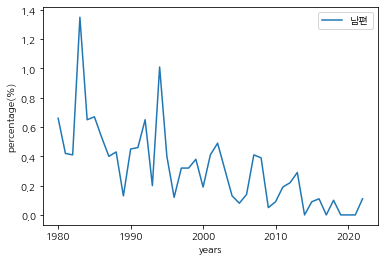

In [61]:
#남편, 아들
plt.plot(drama_word_df.year,drama_word_df['남편'],label = '남편')
#plt.plot(drama_word_df.year,drama_word_df['아들'],label = '아들')
plt.xlabel('years')
plt.ylabel('percentage(%)')
plt.legend()
#plt.show()
plt.savefig('drama_keyword_husband.jpeg',dpi=300)

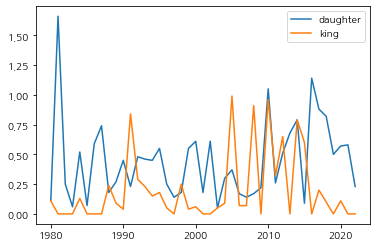

In [26]:
#딸, 왕
plt.plot(drama_word_df.year,drama_word_df['딸'],label = '딸')
plt.plot(drama_word_df.year,drama_word_df['왕'],label = '왕')
plt.xlabel('years')
plt.ylabel('percentage(%)')
plt.legend()
plt.show()

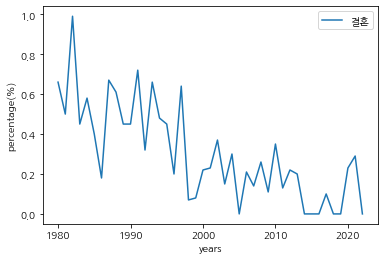

In [62]:
#결혼, 돈
plt.plot(drama_word_df.year,drama_word_df['결혼'],label = '결혼')
#plt.plot(drama_word_df.year,drama_word_df['돈'],label = '돈')
plt.xlabel('years')
plt.ylabel('percentage(%)')
plt.legend()
#plt.show()
plt.savefig('drama_keyword_marraige.jpeg',dpi=300)

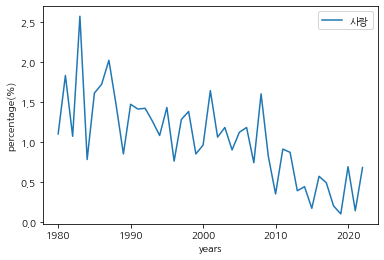

In [63]:
#세계, 사랑
#plt.plot(drama_word_df.year,drama_word_df['세계'],label = '세계')
plt.plot(drama_word_df.year,drama_word_df['사랑'],label = '사랑')
plt.xlabel('years')
plt.ylabel('percentage(%)')
plt.legend()
#plt.show()
plt.savefig('drama_keyword_love.jpeg',dpi=300)

# 애니메이션영화

In [29]:
#애니메이션 영화 

DF_animation=DF[DF.genre.str.contains('애니메이션')]
DF_animation


title  year  audience                 date  \
9                              미니언즈2  2022   2268518  2022-07-20 00:00:00   
21                              씽2게더  2022    883973  2022-01-05 00:00:00   
24     극장판 짱구는 못말려: 수수께끼! 꽃피는 천하떡잎학교  2022    701683  2022-09-28 00:00:00   
27                        극장판 주술회전 0  2022    660340  2022-02-17 00:00:00   
28    극장판 포켓몬스터DP: 기라티나와 하늘의 꽃다발 쉐이미  2022    581225  2022-06-01 00:00:00   
...                              ...   ...       ...                  ...   
4245                     15소년 우주 표류기  1980     68177  1980-07-27 00:00:00   
4247                             삼국지  1980     63377  1980-01-16 00:00:00   
4252                         독수리 5형제  1980     55968  1980-07-26 00:00:00   
4272                        우주대장 애꾸눈  1980     28723  1980-07-25 00:00:00   
4285                    소년 007 은하특공대  1980     22678  1980-12-13 00:00:00   

                   genre                                              actor  \
9         애니메이션, 모험, 코미디  스티브 카렐(그루 목소리), 타라지 P. 헨슨(벨 바텀 목소리), 양자경, 스티브 ...   
21                 애니메이션  매튜 맥커너히(버스터 문 목소리), 리즈 위더스푼(로지타 목소리), 스칼릿 조핸슨(...   
24                 애니메이션                                                nan   
27                 애니메이션  오가타 메구미(옷코츠 유타), 하나자와 카나(오리모토 리카), 코마츠 미카코(젠인 ...   
28                 애니메이션      이선호, 김영선, 마츠모토 리카(사토시 목소리), 이선호, 김영선, 마츠모토 리카   
...                  ...                                                ...   
4245       애니메이션, SF, 모험                                                nan   
4247   애니메이션, 가족, 모험, 전쟁                                                nan   
4252  가족, 모험, 판타지, 애니메이션                                                nan   
4272               애니메이션                                                nan   
4285       애니메이션, 가족, SF                                                nan   

     country                director      age  score  \
9         미국            카일 발다, 카일 발다   전체 관람가   7.68   
21        미국          가스 제닝스, 가스 제닝스   전체 관람가   9.38   
24        일본  타카하시 와타루, 타카하시 와타루, 신고   전체 관람가   9.29   
27        일본                박성후, 박성후  15세 관람가   9.23   
28        일본      유야마 쿠니히코, 유야마 쿠니히코   전체 관람가   7.46   
...      ...                     ...      ...    ...   
4245    대한민국            정수용, 정수용, 신고      nan   7.75   
4247    대한민국            김청기, 김청기, 신고      nan   8.75   
4252    대한민국            이규홍, 이규홍, 신고      nan   7.67   
4272    대한민국            김대중, 김대중, 신고      nan   4.88   
4285    대한민국                임정규, 임정규   전체 관람가    NaN   

                                               synopsis  
9     ['세계 최고의 슈퍼 악당을 꿈꾸는 미니보스 ‘그루’와 그를 따라다니는 미니언들.어...  
21    ['대국민 오디션 이후 각자의 자리에서 꿈을 이루고 있는 버스터 문(매튜 맥커너히)...  
24    ['명문 엘리트 양성학교에 체험 입학하게 된 짱구와 친구들!좋은 성적을 내서 학교에...  
27    ['어릴 적 소꿉친구인 오리모토 리카를 교통사고로 눈앞에서 잃은 옷코츠 유타.“약속...  
28    ['끝나지 않은 전설의 포켓몬들의 배틀로위험에 빠진 반전 세계와 현실 세계를 구하기...  
...                                                 ...  
4245  ['우주선을 견학하기 위해 전세계의 소년, 소녀들이우주선에 탑승하지만 철이의 실수로...  
4247  ['몰락한 한왕조의 후예인 유비는 누상촌에서 돗자리를 만들며 생활하고 있다가 황건적...  
4252                                         ['줄거리 오류']  
4272                                         ['줄거리 오류']  
4285                                               ['']  

[328 rows x 11 columns]

In [30]:
# 애니메이션 영화 시놉시스 태깅(명사)
animation_synopsis_list = {}
for i in range(2022,1979,-1):
    animation_synopsis_list[i] = []
    sentences = DF_animation[DF.year==i]['synopsis'].values.tolist()
    tagged_sentences = [tagger.pos(sent) for sent in sentences]
    for sent in tagged_sentences:   
        for word, tag in sent:
            if tag in ['NNG'] and word not in ['시작', '한편','자신', '속']: #and len(word)>1:
                animation_synopsis_list[i].append(word)


<ipython-input-30-bfc9b85913e3>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sentences = DF_animation[DF.year==i]['synopsis'].values.tolist()


In [31]:
animation_synopsis_list[2021]

['혈',
 '여동생',
 '귀',
 '승객',
 '흔적',
 '노스',
 '임무',
 '수행',
 '탑승',
 '곳',
 '귀',
 '최강',
 '검사',
 '쿠',
 '혈',
 '존재',
 '직감',
 '모두',
 '목숨',
 '음악',
 '일',
 '최고',
 '연주',
 '날',
 '예기',
 '사고',
 '영혼',
 '세상',
 '영혼',
 '멘',
 '토',
 '관심사',
 '발견',
 '지구',
 '통행증',
 '발급',
 '세상',
 '곳',
 '유일',
 '지구',
 '시니컬',
 '멘',
 '토',
 '포기',
 '꿈',
 '무대',
 '지구',
 '통행증',
 '필요',
 '지구',
 '꿈',
 '무대',
 '인생',
 '소속',
 '임원',
 '뉴',
 '지시',
 '형',
 '팀',
 '시간',
 '세상',
 '완수',
 '세계',
 '토',
 '곳',
 '능력',
 '토',
 '덕분',
 '초인',
 '힘',
 '치유',
 '힘',
 '능력',
 '가족',
 '유일',
 '능력',
 '날',
 '토',
 '힘',
 '위험',
 '유일',
 '가족',
 '마지막',
 '희망',
 '생각',
 '세대',
 '관객',
 '웃음',
 '감동',
 '선사',
 '영화',
 '마을',
 '밖',
 '세상',
 '자칭',
 '인간',
 '세상',
 '전문가',
 '모험',
 '감행',
 '물',
 '바다',
 '변신',
 '새',
 '친구',
 '먹',
 '여행',
 '여름',
 '비밀',
 '행복',
 '여름',
 '인간',
 '평화',
 '공존',
 '땅',
 '쿠',
 '왕국',
 '생명',
 '세력',
 '인간',
 '스스로',
 '희생',
 '후',
 '부활',
 '세상',
 '공포',
 '분열',
 '쿠',
 '위해',
 '마지막',
 '모험',
 '여정',
 '세상',
 '세계인',
 '개최',
 '기념',
 '시속',
 '자랑',
 '초전도',
 '개통',
 '발표',
 '모두',
 '주목',
 '가운데',
 '공식',
 '후원사',

In [32]:
# 리스트 틀 만들기
animation_synopsis_info = {
    "연도": [],
    "1위 키워드": [],
    "2위 키워드": [],
    "3위 키워드": [],
    "4위 키워드": [],
    "5위 키워드": [],
    "6위 키워드": [],
    "7위 키워드": [],
    "8위 키워드": [],
    "9위 키워드": [],
    "10위 키워드": []
}
animation_si = pd.DataFrame(animation_synopsis_info)

In [33]:
animation_si

Empty DataFrame
Columns: [연도, 1위 키워드, 2위 키워드, 3위 키워드, 4위 키워드, 5위 키워드, 6위 키워드, 7위 키워드, 8위 키워드, 9위 키워드, 10위 키워드]
Index: []

In [34]:
Counter(animation_synopsis_list[2022]).most_common()[1][1]

9

In [35]:
#for i in range(2022,1979,-1):
    #synopsis_data = Counter(animation_synopsis_list[i]).most_common()
    #synopsis_m = sum(Counter(animation_synopsis_list[i]).values())
    #new_data = {
        #"연도": str(i),
        #"1위 키워드": synopsis_data[0][0] + " (" + '%.2f%%'%(Counter(animation_synopsis_list[i]).most_common()[0][1]/synopsis_m*100) + ")",
        #"2위 키워드": synopsis_data[1][0] + " (" + '%.2f%%'%(Counter(animation_synopsis_list[i]).most_common()[1][1]/synopsis_m*100) + ")",
        #"3위 키워드": synopsis_data[2][0] + " (" + '%.2f%%'%(Counter(animation_synopsis_list[i]).most_common()[2][1]/synopsis_m*100) + ")",
        #"4위 키워드": synopsis_data[3][0] + " (" + '%.2f%%'%(Counter(animation_synopsis_list[i]).most_common()[3][1]/synopsis_m*100) + ")",
        #"5위 키워드": synopsis_data[4][0] + " (" + '%.2f%%'%(Counter(animation_synopsis_list[i]).most_common()[4][1]/synopsis_m*100) + ")",
        #"6위 키워드": synopsis_data[5][0] + " (" + '%.2f%%'%(Counter(animation_synopsis_list[i]).most_common()[5][1]/synopsis_m*100) + ")",
        #"7위 키워드": synopsis_data[6][0] + " (" + '%.2f%%'%(Counter(animation_synopsis_list[i]).most_common()[6][1]/synopsis_m*100) + ")",
        #"8위 키워드": synopsis_data[7][0] + " (" + '%.2f%%'%(Counter(animation_synopsis_list[i]).most_common()[7][1]/synopsis_m*100) + ")",
        #"9위 키워드": synopsis_data[8][0] + " (" + '%.2f%%'%(Counter(animation_synopsis_list[i]).most_common()[8][1]/synopsis_m*100) + ")",
        #"10위 키워드": synopsis_data[9][0] + " (" + '%.2f%%'%(Counter(animation_synopsis_list[i]).most_common()[9][1]/synopsis_m*100) + ")",}
    #animation_si = animation_si.append(new_data,ignore_index=True)

#animation_si = animation_si.set_index("연도")

In [36]:
with open('/content/drive/MyDrive/data_journalism/animation_si.xlsx',mode="rb") as excel_file:
    animation_si = pd.read_excel(excel_file)

In [37]:
animation_si

Unnamed: 0    연도       1위 키워드       2위 키워드       3위 키워드       4위 키워드  \
0            0  2022   친구 (3.04%)   세계 (1.61%)    힘 (1.25%)   위험 (1.07%)   
1            1  2021   가족 (2.92%)    귀 (1.95%)    혈 (1.56%)   인간 (1.56%)   
2            2  2020   친구 (3.90%)   세상 (2.93%)  특공대 (2.44%)    새 (1.95%)   
3            3  2019   친구 (3.72%)   세상 (2.09%)   사람 (2.09%)   평화 (1.63%)   
4            4  2018   친구 (2.97%)   막내 (2.60%)   가족 (2.60%)   마을 (1.86%)   
5            5  2017   친구 (3.82%)    숲 (1.91%)   사람 (1.59%)   비밀 (1.59%)   
6            6  2016   사건 (2.06%)   주인 (1.37%)   상금 (1.37%)    꿈 (1.37%)   
7            7  2015   친구 (2.65%)   인간 (2.36%)   세계 (2.36%)   특급 (2.06%)   
8            8  2014   친구 (2.66%)   공원 (1.99%)   가족 (1.66%)    날 (1.33%)   
9            9  2013   저택 (3.05%)   친구 (2.29%)    숲 (2.04%)   가족 (1.78%)   
10          10  2012   엄마 (2.16%)   위기 (1.89%)   게임 (1.62%)    날 (1.62%)   
11          11  2011   마을 (2.50%)   인간 (1.67%)   친구 (1.67%)    나 (1.39%)   
12          12  2010   인간 (2.44%)   세상 (2.17%)   친구 (1.90%)   바다 (1.90%)   
13          13  2009   세계 (2.86%)   사건 (2.86%)   친구 (2.14%)    날 (1.43%)   
14          14  2008   인간 (2.49%)   소스 (2.21%)    포 (2.21%)   우주 (2.21%)   
15          15  2007   인간 (3.65%)   생활 (2.60%)    귀 (2.08%)   운명 (1.56%)   
16          16  2006    맘 (1.99%)   앞집 (1.59%)   비밀 (1.59%)   사랑 (1.59%)   
17          17  2005   친구 (2.66%)   마을 (2.13%)    마 (1.60%)    티 (1.60%)   
18          18  2004    키 (5.95%)    곰 (4.85%)   오디 (3.08%)   나이 (2.20%)   
19          19  2003    책 (3.93%)    일 (3.93%)    앞 (2.81%)   세계 (2.25%)   
20          20  2002    릴 (6.40%)    줌 (2.74%)   인간 (2.44%)   지구 (2.13%)   
21          21  2001   인간 (4.01%)    부 (2.23%)   벽장 (1.78%)   콤비 (1.78%)   
22          22  2000    닭 (3.24%)   바람 (2.70%)   자연 (2.16%)  목소리 (1.89%)   
23          23  1999  목소리 (6.63%)   친구 (3.01%)   발견 (3.01%)   아기 (3.01%)   
24          24  1998  목소리 (4.75%)   개미 (4.11%)   벌레 (1.54%)    날 (1.28%)   
25          25  1997  할머니 (3.39%)   황실 (2.54%)    후 (2.54%)    신 (2.12%)   
26          26  1996   우주 (3.60%)   엄마 (2.80%)   지구 (2.80%)   문명 (2.80%)   
27          27  1995  목소리 (8.72%)    딸 (2.33%)  인디언 (2.33%)   아이 (1.74%)   
28          28  1994    왕 (3.06%)   사랑 (3.06%)  모터쇼 (3.06%)   살해 (2.04%)   
29          29  1993   탈출 (7.14%)  자스민 (7.14%)   자파 (7.14%)   아부 (3.57%)   
30          30  1992  아버지 (8.33%)    숲 (8.33%)   언니 (4.17%)   소녀 (4.17%)   
31          31  1991   에 (14.29%)  왕자 (10.71%)   영혼 (7.14%)   통치 (3.57%)   
32          32  1990   귀 (10.00%)  토끼 (10.00%)   고층 (5.00%)  아파트 (5.00%)   

         5위 키워드       6위 키워드        7위 키워드       8위 키워드       9위 키워드  \
0    최고 (0.89%)  엉덩이 (0.89%)     루 (0.89%)    토 (0.89%)   행성 (0.89%)   
1    세상 (1.36%)   친구 (1.36%)    세계 (1.17%)    쿠 (0.97%)    토 (0.97%)   
2    아빠 (1.95%)   지구 (1.95%)    평화 (1.46%)   마을 (1.46%)   가족 (1.46%)   
3     힘 (1.63%)   공격 (1.63%)     섬 (1.63%)   비밀 (1.40%)   모험 (1.40%)   
4    세계 (1.86%)   능력 (1.49%)     날 (1.49%)   비밀 (1.49%)   모험 (1.49%)   
5     몸 (1.27%)   운명 (1.27%)     날 (1.27%)   발견 (1.27%)   도착 (1.27%)   
6   아버지 (1.37%)   무대 (1.37%)    친구 (1.37%)   평화 (1.37%)   기억 (1.37%)   
7     날 (2.06%)   세상 (1.47%)    감정 (1.18%)   본부 (1.18%)   최고 (1.18%)   
8     앞 (1.33%)   최고 (1.33%)    위험 (1.33%)    더 (1.33%)   비밀 (1.00%)   
9     날 (1.78%)   동물 (1.53%)  할아버지 (1.53%)   세상 (1.53%)   인간 (1.53%)   
10   세계 (1.35%)   친구 (1.35%)    비밀 (1.35%)    큐 (1.35%)   건물 (1.08%)   
11    섬 (1.39%)    포 (1.39%)    세상 (1.39%)   사건 (1.39%)    앞 (1.11%)   
12   세계 (1.63%)    날 (1.36%)    사람 (1.36%)   음식 (1.36%)   운명 (1.08%)   
13   위기 (1.43%)   학교 (1.07%)    모험 (1.07%)   야생 (1.07%)    앞 (1.07%)   
14    햄 (1.93%)   바다 (1.66%)    육지 (1.66%)   마을 (1.66%)   세상 (1.38%)   
15    링 (1.56%)    르 (1.56%)     집 (1.56%)   야생 (1.56%)    부 (1.56%)   
16   하늘 (1.59%)  디제이 (1.20%)    생각 (1.20%)   사건 (1.20%)  할머니 (1.20%)   
17   세계 (1.60%)   부모 (1.60%)    인기 (1.06%)   사실 (1.06%)   안락 (1.06%)   
18   동생 (1.54%)    몸 (1.32%)     곳 (1.10%)    말 (1.

In [38]:
for i in range(2022,1979,-1):
  synopsis_m = sum(Counter(animation_synopsis_list[i]).values())
  if synopsis_m ==0:
    print(i)

1988
1987
1986


In [39]:
word_count_1_data=[]
word_count_2_data=[]
word_count_3_data=[]
word_count_4_data=[]
word_count_5_data=[]
word_count_6_data=[]
word_count_7_data=[]
word_count_8_data=[]
word_count_9_data=[]
word_count_10_data=[]
year_data=[]
for i in range(2022,1989,-1):
  count_num_1 = animation_synopsis_list[i].count('친구')
  count_num_2 = animation_synopsis_list[i].count('비밀')
  count_num_3 = animation_synopsis_list[i].count('모험')
  count_num_4 = animation_synopsis_list[i].count('세계')
  count_num_5 = animation_synopsis_list[i].count('세상')
  count_num_6 = animation_synopsis_list[i].count('가족')
  count_num_7 = animation_synopsis_list[i].count('동물')
  count_num_8 = animation_synopsis_list[i].count('지구')
  count_num_9 = animation_synopsis_list[i].count('마을')
  count_num_10 = animation_synopsis_list[i].count('우주')
  synopsis_m = sum(Counter(animation_synopsis_list[i]).values())
  word_count_1_data.append(round(count_num_1/synopsis_m*100,2))
  word_count_2_data.append(round(count_num_2/synopsis_m*100,2))
  word_count_3_data.append(round(count_num_3/synopsis_m*100,2))
  word_count_4_data.append(round(count_num_4/synopsis_m*100,2))
  word_count_5_data.append(round(count_num_5/synopsis_m*100,2))
  word_count_6_data.append(round(count_num_6/synopsis_m*100,2))
  word_count_7_data.append(round(count_num_7/synopsis_m*100,2))
  word_count_8_data.append(round(count_num_8/synopsis_m*100,2))
  word_count_9_data.append(round(count_num_9/synopsis_m*100,2))
  word_count_10_data.append(round(count_num_10/synopsis_m*100,2))
  year_data.append(i)


In [40]:

animation_word_df_data={'year': year_data, '친구': word_count_1_data, '비밀': word_count_2_data, '모험' : word_count_3_data, '세계' : word_count_4_data, '세상' : word_count_5_data, '가족' : word_count_6_data, '동물' :word_count_7_data, '지구' : word_count_8_data, '마을' : word_count_9_data, '우주': word_count_10_data}
animation_word_df = pd.DataFrame(animation_word_df_data)

animation_word_df

year    친구    비밀    모험    세계    세상    가족    동물    지구    마을    우주
0   2022  3.04  0.36  0.36  1.61  0.36  0.54  0.00  0.89  0.36  0.18
1   2021  1.36  0.39  0.78  1.17  1.36  2.92  0.00  0.97  0.58  0.00
2   2020  3.90  0.00  0.98  0.98  2.93  1.46  0.49  1.95  1.46  0.00
3   2019  3.72  1.40  1.40  0.70  2.09  1.40  0.00  0.70  0.47  0.00
4   2018  2.97  1.49  1.49  1.86  1.12  2.60  0.00  0.00  1.86  0.00
5   2017  3.82  1.59  0.96  0.32  0.32  0.64  0.00  0.00  0.32  0.00
6   2016  1.37  1.03  0.34  0.69  0.00  1.37  0.69  0.34  0.69  0.34
7   2015  2.65  0.29  1.18  2.36  1.47  0.00  0.00  0.29  0.59  0.29
8   2014  2.66  1.00  1.00  0.66  0.66  1.66  1.00  0.33  0.00  0.33
9   2013  2.29  0.00  0.25  0.51  1.53  1.78  1.53  0.00  0.76  0.00
10  2012  1.35  1.35  0.81  1.35  1.08  1.08  0.54  0.27  0.54  0.00
11  2011  1.67  0.00  0.28  0.28  1.39  0.28  0.00  0.00  2.50  0.00
12  2010  1.90  0.54  0.81  1.63  2.17  0.27  0.00  0.27  0.81  0.00
13  2009  2.14  0.36  1.07  2.86  0.71  0.36  0.36  0.71  0.36  0.00
14  2008  0.55  0.00  0.28  1.10  1.38  0.00  0.00  1.38  1.66  2.21
15  2007  0.00  0.00  0.00  1.04  0.52  0.52  0.52  0.52  0.00  0.00
16  2006  0.80  1.59  0.40  0.40  1.20  0.40  0.80  0.00  0.40  0.00
17  2005  2.66  0.00  0.00  1.60  0.53  0.00  0.53  0.00  2.13  0.00
18  2004  0.00  0.00  0.22  0.44  0.22  0.00  0.22  0.00  0.00  0.00
19  2003  1.12  0.00  0.56  2.25  1.69  0.00  0.00  0.00  0.00  0.56
20  2002  0.30  0.00  0.00  0.30  0.30  0.61  1.22  2.13  0.61  1.22
21  2001  0.00  0.00  0.22  1.78  0.22  0.00  0.22  0.89  0.89  0.00
22  2000  0.00  0.27  0.27  0.00  0.00  0.00  0.00  1.08  1.08  0.00
23  1999  3.01  0.00  0.00  0.60  0.00  1.20  1.20  0.00  0.00  0.00
24  1998  0.13  0.26  0.26  0.00  0.00  0.26  0.00  0.00  0.00  0.00
25  1997  0.42  0.00  0.00  0.00  0.00  1.69  0.00  0.00  0.42  0.00
26  1996  0.80  0.00  0.00  0.40  0.40  0.00  0.00  2.80  0.00  3.60
27  1995  0.58  0.00  1.16  0.58  0.58  0.00  0.00  0.00  0.58  0.58
28  1994  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00
29  1993  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00
30  1992  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00
31  1991  0.00  0.00  0.00  3.57  0.00  0.00  0.00  0.00  0.00  0.00
32  1990  5.00  0.00  0.00  0.00  5.00  0.00  0.00  0.00  0.00  0.00

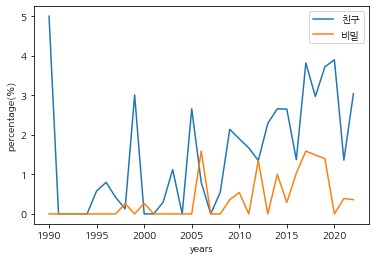

In [64]:
#친구, 비밀
plt.plot(animation_word_df.year,animation_word_df['친구'],label = '친구')
plt.plot(animation_word_df.year,animation_word_df['비밀'],label = '비밀')
plt.xlabel('years')
plt.ylabel('percentage(%)')
plt.legend()
plt.show()

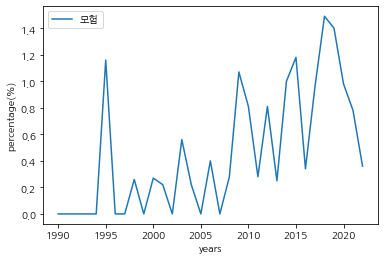

In [65]:
#모험, 세계
plt.plot(animation_word_df.year,animation_word_df['모험'],label = '모험')
#plt.plot(animation_word_df.year,animation_word_df['세계'],label = '세계')
plt.xlabel('years')
plt.ylabel('percentage(%)')
plt.legend()
#plt.show()
plt.savefig('animation_keyword_adventure.jpeg',dpi=300)

In [43]:
#세상, 가족
plt.plot(animation_word_df.year,animation_word_df['세상'],label = '세상')
plt.plot(animation_word_df.year,animation_word_df['가족'],label = '가족')
plt.xlabel('years')
plt.ylabel('percentage(%)')
plt.legend()
plt.show()

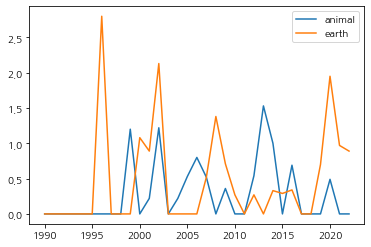

In [44]:
#동물, 지구
plt.plot(animation_word_df.year,animation_word_df['동물'],label = '동물')
plt.plot(animation_word_df.year,animation_word_df['지구'],label = '지구')
plt.xlabel('years')
plt.ylabel('percentage(%)')
plt.legend()
plt.show()

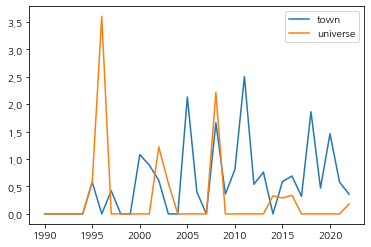

In [45]:
#마을, 우주
plt.plot(animation_word_df.year,animation_word_df['마을'],label = '마을')
plt.plot(animation_word_df.year,animation_word_df['우주'],label = '우주')
plt.xlabel('years')
plt.ylabel('percentage(%)')
plt.legend()
plt.show()

# 판타지영화

In [7]:
#판타지 영화

DF_fantasy=DF[DF.genre.str.contains('판타지')]
DF_fantasy

title  year  audience                 date  \
4     닥터 스트레인지: 대혼돈의 멀티버스  2022   5884600  2022-05-04 00:00:00   
8             토르: 러브 앤 썬더  2022   2715683  2022-07-06 00:00:00   
14                외계+인 1부  2022   1538518  2022-07-20 00:00:00   
17      신비한 동물들과 덤블도어의 비밀  2022   1195563  2022-04-13 00:00:00   
42                 수퍼 소닉2  2022    315123  2022-04-06 00:00:00   
...                   ...   ...       ...                  ...   
4013                엑스칼리버  1981    180247  1981-12-25 00:00:00   
4106                  귀타귀  1981    227628  1981-04-17 00:00:00   
4121                슈퍼맨 2  1981    161207  1981-07-25 00:00:00   
4155                엑스칼리버  1981     29304  1981-12-25 00:00:00   
4252              독수리 5형제  1980     55968  1980-07-26 00:00:00   

                                genre  \
4                         액션, 판타지, 모험   
8                         액션, 모험, 판타지   
14                        액션, 판타지, SF   
17                        판타지, 모험, 가족   
42    애니메이션, 액션, 모험, 코미디, 가족, 판타지, SF   
...                               ...   
4013                     모험, 드라마, 판타지   
4106                     액션, 코미디, 판타지   
4121                  모험, 판타지, SF, 액션   
4155                     모험, 드라마, 판타지   
4252               가족, 모험, 판타지, 애니메이션   

                                                  actor  country  \
4     베네딕트 컴버배치(닥터 스트레인지), 엘리자베스 올슨(완다 막시모프 / 스칼렛 위치...       미국   
8     크리스 헴스워스(토르), 나탈리 포트만(제인 포스터), 테사 톰슨(발키리), 크리스...       미국   
14          류준열(무륵), 김우빈(가드/썬더), 김태리(이안), 류준열, 김우빈, 김태리     대한민국   
17    에디 레드메인(뉴트 스캐맨더), 주드 로(알버스 덤블도어), 매즈 미켈슨(겔러트 그...       미국   
42           제임스 마스던, 짐 캐리, 벤 슈와츠, 제임스 마스던, 짐 캐리, 벤 슈와츠  미국, 캐나다   
...                                                 ...      ...   
4013  나이젤 테리(아더 왕), 헬렌 미렌(모가나), 니콜라스 클레이(란셀롯), 나이젤 테...   미국, 영국   
4106                                           홍금보, 홍금보       홍콩   
4121  진 핵크만(렉스 루더), 크리스토퍼 리브(슈퍼맨/클락 켄트), 진 핵크만, 크리스토...       영국   
4155  나이젤 테리(아더 왕), 헬렌 미렌(모가나), 니콜라스 클레이(란셀롯), 나이젤 테...   미국, 영국   
4252                                                nan     대한민국   

                director          age  score  \
4           샘 레이미, 샘 레이미      12세 관람가   7.22   
8     타이카 와이티티, 타이카 와이티티      12세 관람가   6.38   
14              최동훈, 최동훈      12세 관람가   7.53   
17      데이빗 예이츠, 데이빗 예이츠      12세 관람가   6.49   
42    제프 파울러, 제프 파울러, 신고       전체 관람가   8.23   
...                  ...          ...    ...   
4013        존 부어만, 존 부어만   15세 관람가, R    NaN   
4106        홍금보, 홍금보, 신고  15세 관람가, NR   8.20   
4121    리처드 레스터, 리처드 레스터           PG   8.53   
4155        존 부어만, 존 부어만   15세 관람가, R    NaN   
4252        이규홍, 이규홍, 신고          nan   7.67   

                                               synopsis  
4     ['끝없이 균열되는 차원과 뒤엉킨 시공간의 멀티버스가 열리며오랜 동료들, 그리고 차...  
8     ['슈퍼 히어로 시절이여, 안녕!이너피스를 위해 자아 찾기 여정을 떠난 천둥의 신 ...  
14    ['2022년 현재, ‘가드’(김우빈)’와 ‘썬더’는 인간의 몸에 가두어진 외계인 ...  
17    ['1930년대, 제2차 세계대전에 마법사들이 개입하게 되면서강력한 어둠의 마법사 ...  
42    ['도시의 악당들을 물리치며 바쁘게 지구를 지키고 있는 초특급 히어로 ‘소닉’.버섯...  
...                                                 ...  
4013  ['마법사 마린으로부터 마검 엑스칼리버를 얻어 나라를 통일한 우사는, 강적 콘볼과의...  
4106  ['겁이 없고 대담하기로 유명한 장대담은 탐 나리의 인력거를 끌며 성실하게 살아간다...  
4121  ["테러리스트들이 파리의 에펠탑을 점거하고 관광객을 인질로 하여 프랑스 정부에게 자...  
4155  ['마법사 마린으로부터 마검 엑스칼리버를 얻어 나라를 통일한 우사는, 강적 콘볼과의...  
4252                                         ['줄거리 오류']  

[413 rows x 11 columns]

In [8]:
#판타지영화 시놉시스 태깅(명사)
fantasy_synopsis_list = {}
for i in range(2022,1979,-1):
    fantasy_synopsis_list[i] = []
    sentences = DF_fantasy[DF.year==i]['synopsis'].values.tolist()
    tagged_sentences = [tagger.pos(sent) for sent in sentences]
    for sent in tagged_sentences:   
        for word, tag in sent:
            if tag in ['NNG'] and word not in ['한편', '시작']: #and len(word)>1:
                fantasy_synopsis_list[i].append(word)

<ipython-input-8-30feaa62b7ab>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sentences = DF_fantasy[DF.year==i]['synopsis'].values.tolist()


In [9]:
# 리스트 틀 만들기
fantasy_synopsis_info = {
    "연도": [],
    "1위 키워드": [],
    "2위 키워드": [],
    "3위 키워드": [],
    "4위 키워드": [],
    "5위 키워드": [],
    "6위 키워드": [],
    "7위 키워드": [],
    "8위 키워드": [],
    "9위 키워드": [],
    "10위 키워드": []
}
fantasy_si = pd.DataFrame(fantasy_synopsis_info)

In [49]:
#for i in range(2022,1979,-1):
    #synopsis_data = Counter(fantasy_synopsis_list[i]).most_common()
    #synopsis_m = sum(Counter(fantasy_synopsis_list[i]).values())
    #new_data = {
        #"연도": str(i),
        #"1위 키워드": synopsis_data[0][0] + " (" + '%.2f%%'%(Counter(fantasy_synopsis_list[i]).most_common()[0][1]/synopsis_m*100) + ")",
        #"2위 키워드": synopsis_data[1][0] + " (" + '%.2f%%'%(Counter(fantasy_synopsis_list[i]).most_common()[1][1]/synopsis_m*100) + ")",
        #"3위 키워드": synopsis_data[2][0] + " (" + '%.2f%%'%(Counter(fantasy_synopsis_list[i]).most_common()[2][1]/synopsis_m*100) + ")",
        #"4위 키워드": synopsis_data[3][0] + " (" + '%.2f%%'%(Counter(fantasy_synopsis_list[i]).most_common()[3][1]/synopsis_m*100) + ")",
        #"5위 키워드": synopsis_data[4][0] + " (" + '%.2f%%'%(Counter(fantasy_synopsis_list[i]).most_common()[4][1]/synopsis_m*100) + ")",
        #"6위 키워드": synopsis_data[5][0] + " (" + '%.2f%%'%(Counter(fantasy_synopsis_list[i]).most_common()[5][1]/synopsis_m*100) + ")",
        #"7위 키워드": synopsis_data[6][0] + " (" + '%.2f%%'%(Counter(fantasy_synopsis_list[i]).most_common()[6][1]/synopsis_m*100) + ")",
        #"8위 키워드": synopsis_data[7][0] + " (" + '%.2f%%'%(Counter(fantasy_synopsis_list[i]).most_common()[7][1]/synopsis_m*100) + ")",
        #"9위 키워드": synopsis_data[8][0] + " (" + '%.2f%%'%(Counter(fantasy_synopsis_list[i]).most_common()[8][1]/synopsis_m*100) + ")",
        #"10위 키워드": synopsis_data[9][0] + " (" + '%.2f%%'%(Counter(fantasy_synopsis_list[i]).most_common()[9][1]/synopsis_m*100) + ")",}
    #fantasy_si = fantasy_si.append(new_data,ignore_index=True)

#fantasy_si = fantasy_si.set_index("연도")

In [10]:
with open('/content/drive/MyDrive/data_journalism/fantasy_si.xlsx',mode="rb") as excel_file:
    fantasy_si = pd.read_excel(excel_file)

In [11]:
fantasy_si

Unnamed: 0    연도       1위 키워드       2위 키워드       3위 키워드       4위 키워드  \
0            0  2022   전쟁 (3.31%)    신 (2.48%)   지구 (2.48%)   차지 (2.48%)   
1            1  2021    힘 (4.65%)   이후 (2.33%)   세상 (2.33%)  아버지 (2.33%)   
2            2  2020   세상 (3.05%)   친구 (3.05%)   사랑 (2.54%)   위험 (2.03%)   
3            3  2019    힘 (3.56%)   친구 (3.16%)    날 (2.37%)   모험 (2.37%)   
4            4  2018   저승 (4.71%)   과거 (2.35%)    맥 (1.76%)    덕 (1.76%)   
5            5  2017   세상 (2.51%)   운명 (2.05%)   망자 (1.82%)   인간 (1.59%)   
6            6  2016   세상 (3.02%)   과거 (2.26%)   데스 (1.51%)   시간 (1.51%)   
7            7  2015   마을 (3.50%)   정의 (2.00%)  대통령 (2.00%)    날 (2.00%)   
8            8  2014   세상 (2.75%)   위험 (2.20%)   소리 (1.65%)   공격 (1.65%)   
9            9  2013   인간 (2.68%)   사람 (2.35%)   지구 (1.68%)   존재 (1.68%)   
10          10  2012    날 (1.85%)   세계 (1.62%)   엄마 (1.62%)   마을 (1.39%)   
11          11  2011    신 (3.25%)   인간 (3.25%)   전쟁 (2.16%)   세상 (2.16%)   
12          12  2010   인간 (2.52%)   세상 (2.13%)    신 (1.36%)    날 (1.36%)   
13          13  2009    날 (2.59%)   세계 (1.88%)   세상 (1.88%)   사랑 (1.88%)   
14          14  2008   지구 (2.17%)   세상 (1.58%)   위협 (1.38%)   세계 (1.38%)   
15          15  2007   세계 (1.81%)    힘 (1.53%)   전쟁 (1.25%)   예언 (1.25%)   
16          16  2006   사람 (1.66%)   사랑 (1.66%)   아들 (1.53%)   전쟁 (1.39%)   
17          17  2005   세계 (1.83%)    섬 (1.31%)   공장 (1.31%)   존재 (1.17%)   
18          18  2004    키 (3.45%)    곰 (2.81%)   사람 (1.28%)   사랑 (1.28%)   
19          19  2003   인간 (1.73%)    일 (1.33%)   전쟁 (1.22%)   세계 (1.02%)   
20          20  2002   학교 (2.89%)    론 (2.48%)   인간 (2.07%)   교수 (1.65%)   
21          21  2001   인간 (3.29%)   세계 (1.77%)    날 (1.52%)    부 (1.39%)   
22          22  2000   사랑 (1.87%)   사람 (1.25%)   마을 (1.14%)    눈 (0.94%)   
23          23  1999   마을 (2.18%)   복수 (1.45%)   박사 (1.45%)    때 (1.45%)   
24          24  1998  목소리 (3.09%)   개미 (2.82%)   사랑 (2.03%)   남자 (1.32%)   
25          25  1997   사람 (1.97%)   박사 (1.82%)   물질 (1.51%)  글라스 (1.51%)   
26          26  1996   지석 (3.22%)   아이 (2.35%)    인 (2.23%)    검 (1.98%)   
27          27  1995  목소리 (3.16%)   외계 (2.11%)   회장 (2.11%)   저택 (1.58%)   
28          28  1994   연구 (3.12%)   지구 (2.34%)   노예 (2.34%)   발견 (1.95%)   
29          29  1993    큐 (5.01%)   인간 (2.37%)   영화 (2.11%)    힘 (1.32%)   
30          30  1992    매 (4.59%)   박사 (2.14%)    종 (1.83%)   아들 (1.53%)   
31          31  1991   사랑 (3.00%)    키 (1.87%)   여자 (1.87%)   십방 (1.69%)   
32          32  1990   박사 (2.90%)    마 (2.49%)    티 (2.49%)   인간 (2.49%)   
33          33  1989   사람 (3.79%)   어른 (3.79%)   박사 (2.27%)    조 (2.27%)   
34          34  1988   영화 (9.87%)   모습 (4.61%)   중간 (2.63%)   현장 (1.97%)   
35          35  1987   구출 (2.69%)    루 (2.69%)  아버지 (2.69%)   사실 (2.69%)   
36          36  1986    나 (4.40%)    로 (3.77%)    성 (3.14%)    판 (3.14%)   
37          37  1985    잠 (3.24%)    꿈 (3.24%)  어머니 (2.83%)    집 (2.02%)   
38          38  1984    집 (5.08%)  외계인 (5.08%)   유령 (3.39%)   집안 (3.39%)   
39          39  1983    사 (4.05%)   마을 (3.38%)    마 (3.38%)   도움 (2.03%)   
40          40  1982   아이 (7.25%)   왕국 (4.35%)   사람 (4.35%)   사악 (2.90%)   
41          41  1981   대담 (4.95%)    힘 (2.20%)   기사 (2.20%)   사실 (2.20%)   

         5위 키워드        6위 키워드       7위 키워드       8위 키워드      9위 키워드  \
0    차원 (1.65%)    우주 (1.65%)   계획 (1.65%)    팀 (1.65%)  복수 (1.65%)   
1    선택 (2.33%)    운명 (2.33%)    코 (2.33%)   그림 (2.33%)  모습 (1.16%)   
2    모험 (2.03%)    아빠 (2.03%)   동물 (1.52%)   능력 (1.52%)  시간 (1.52%)   
3    위험 (1.98%)    세상 (1.98%)   왕자 (1.98%)   왕국 (1.58%)  과거 (1.58%)   
4    비밀 (1.76%)    가족 (1.76%)   엄마 (1.76%)   모험 (1.76%)  열쇠 (1.76%)   
5    죽음 (1.59%)     힘 (1.59%)   저승 (1.37%)   재판 (1.37%)  환생 (1.37%)   
6   아버지 (1.26%)    비밀 (1.26%)    눈 (1.26%)   전쟁 (1.26%)  신비 (1.26%)   
7    친구 (2.00%)     팁 (2.00%)   기운 (1.50%)   우주 (1.50%)   때 (1.50%)   
8     왕 (1.65%)    전쟁 (1.65%)   여정 (1.38%)   군대 (1.38%)  분파 (1.38%)   
9     칼 (1.68%)    세상 (1.

In [12]:
word_count_1_data=[]
word_count_2_data=[]
word_count_3_data=[]
word_count_4_data=[]
word_count_5_data=[]
word_count_6_data=[]
word_count_7_data=[]
word_count_8_data=[]
word_count_9_data=[]
word_count_10_data=[]
year_data=[]
for i in range(2022,1979,-1):
  count_num_1 = fantasy_synopsis_list[i].count('세상')
  count_num_2 = fantasy_synopsis_list[i].count('인간')
  count_num_3 = fantasy_synopsis_list[i].count('운명')
  count_num_4 = fantasy_synopsis_list[i].count('지구')
  count_num_5 = fantasy_synopsis_list[i].count('왕국')
  count_num_6 = fantasy_synopsis_list[i].count('전쟁')
  count_num_7 = fantasy_synopsis_list[i].count('신')
  count_num_8 = fantasy_synopsis_list[i].count('친구')
  count_num_9 = fantasy_synopsis_list[i].count('세계')
  count_num_10 = fantasy_synopsis_list[i].count('우주')
  synopsis_m = sum(Counter(fantasy_synopsis_list[i]).values())
  word_count_1_data.append(round(count_num_1/synopsis_m*100,2))
  word_count_2_data.append(round(count_num_2/synopsis_m*100,2))
  word_count_3_data.append(round(count_num_3/synopsis_m*100,2))
  word_count_4_data.append(round(count_num_4/synopsis_m*100,2))
  word_count_5_data.append(round(count_num_5/synopsis_m*100,2))
  word_count_6_data.append(round(count_num_6/synopsis_m*100,2))
  word_count_7_data.append(round(count_num_7/synopsis_m*100,2))
  word_count_8_data.append(round(count_num_8/synopsis_m*100,2))
  word_count_9_data.append(round(count_num_9/synopsis_m*100,2))
  word_count_10_data.append(round(count_num_10/synopsis_m*100,2))
  year_data.append(i)

In [13]:
fantasy_word_df_data={'year': year_data, '세상': word_count_1_data, '인간': word_count_2_data, '운명' : word_count_3_data, '지구' : word_count_4_data, '왕국' : word_count_5_data, '전쟁' : word_count_6_data, '신' :word_count_7_data, '친구' : word_count_8_data, '세계' : word_count_9_data, '우주': word_count_10_data}
fantasy_word_df = pd.DataFrame(fantasy_word_df_data)

fantasy_word_df

year    세상    인간    운명    지구    왕국    전쟁     신    친구    세계    우주
0   2022  1.56  1.56  0.00  2.34  0.00  3.12  2.34  0.78  1.56  1.56
1   2021  2.33  0.00  2.33  0.00  0.00  0.00  0.00  0.00  1.16  1.16
2   2020  2.96  0.00  1.48  0.99  0.00  0.49  0.00  2.96  0.49  0.49
3   2019  1.89  0.76  1.52  0.00  1.52  0.38  0.38  3.03  1.52  0.00
4   2018  0.58  0.58  0.58  0.00  0.58  0.00  0.00  0.00  1.16  0.58
5   2017  2.41  1.54  1.97  0.22  0.00  0.88  0.00  0.66  0.66  0.22
6   2016  2.96  1.23  0.49  0.00  0.25  1.23  0.74  0.25  0.99  0.00
7   2015  0.00  0.00  0.00  0.99  0.00  0.00  0.00  1.97  0.49  1.48
8   2014  2.64  1.06  0.00  0.00  0.53  1.58  0.26  1.06  0.00  0.00
9   2013  1.64  2.62  0.33  1.64  0.66  0.98  1.31  0.66  1.64  0.66
10  2012  1.32  0.44  0.66  0.00  0.88  0.88  0.88  0.22  1.55  0.00
11  2011  2.11  3.17  1.27  0.85  0.00  2.11  3.17  1.06  1.69  0.00
12  2010  2.05  2.42  0.74  0.00  0.37  1.12  1.30  0.74  0.93  0.00
13  2009  1.82  0.68  0.45  0.45  0.00  0.00  0.00  0.91  1.82  0.23
14  2008  1.52  0.38  0.19  2.09  0.00  0.19  0.00  0.38  1.33  0.19
15  2007  0.80  1.20  1.20  0.40  0.13  1.20  0.00  0.53  1.74  0.13
16  2006  0.66  1.20  0.53  0.53  0.00  1.33  0.00  0.13  0.66  0.00
17  2005  0.51  1.15  0.51  0.00  0.00  0.25  0.00  0.51  1.78  0.38
18  2004  0.50  0.00  0.50  0.00  0.00  0.12  0.25  0.00  0.12  0.00
19  2003  0.39  1.67  0.39  0.00  0.00  1.18  0.39  0.49  0.99  0.20
20  2002  0.60  2.00  0.40  0.40  0.00  1.20  0.20  1.00  0.20  0.00
21  2001  0.37  3.21  0.25  0.49  0.12  0.62  0.12  0.49  1.73  0.37
22  2000  0.00  0.00  0.60  0.10  0.00  0.20  0.20  0.40  0.30  0.00
23  1999  0.47  0.24  0.24  0.47  0.00  0.00  0.00  0.24  0.71  0.00
24  1998  0.43  0.68  0.09  0.00  0.26  0.09  0.00  0.26  0.00  0.00
25  1997  0.00  0.44  0.00  0.00  0.00  0.00  0.00  0.15  0.15  0.73
26  1996  0.36  0.24  0.72  0.24  0.00  0.00  0.00  0.60  0.12  0.00
27  1995  0.00  0.00  0.00  0.78  0.00  0.00  0.00  0.52  0.52  0.26
28  1994  0.00  0.78  0.00  2.34  0.00  0.00  0.00  0.00  0.39  0.00
29  1993  0.25  2.27  0.51  0.00  0.00  0.25  0.00  0.25  1.26  0.00
30  1992  0.60  0.30  0.00  0.00  0.00  0.00  0.00  0.30  0.30  0.00
31  1991  0.18  1.11  0.00  0.18  0.18  0.00  0.00  0.00  0.37  0.00
32  1990  0.40  2.41  0.00  0.00  0.00  0.80  0.40  0.40  1.20  0.00
33  1989  0.00  0.00  0.00  0.00  0.00  0.00  0.73  0.00  1.46  0.00
34  1988  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.65  1.29  0.00
35  1987  0.00  0.44  0.00  0.00  0.00  0.00  0.00  1.75  0.00  1.75
36  1986  0.00  0.00  0.62  0.00  0.62  0.00  1.88  0.62  0.00  0.00
37  1985  0.00  0.78  0.00  0.00  0.00  0.00  0.00  1.57  0.00  0.00
38  1984  0.00  1.59  0.00  1.59  0.00  0.00  0.00  0.00  0.00  0.00
39  1983  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.67  0.00  0.00
40  1982  0.00  1.43  1.43  0.00  4.29  0.00  0.00  0.00  0.00  0.00
41  1981  0.00  0.53  0.00  1.07  1.07  0.00  0.00  0.00  0.00  0.53
42  1980  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00

In [15]:
#세상, 세계
plt.plot(fantasy_word_df.year,fantasy_word_df['세상'],label = '세상')
plt.plot(fantasy_word_df.year,fantasy_word_df['세계'],label = '세계')
plt.xlabel('years')
plt.ylabel('percentage(%)')
plt.legend()
#plt.show()
plt.savefig('fantasy_keyword_world&globe.jpeg',dpi=300)

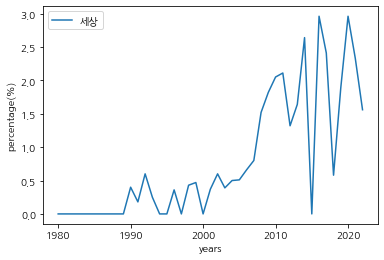

In [67]:
#세상, 인간
plt.plot(fantasy_word_df.year,fantasy_word_df['세상'],label = '세상')
#plt.plot(fantasy_word_df.year,fantasy_word_df['인간'],label = '인간')
plt.xlabel('years')
plt.ylabel('percentage(%)')
plt.legend()
#plt.show()
plt.savefig('fantasy_keyword_globe.jpeg',dpi=300)

In [55]:
#운명, 지구
plt.plot(fantasy_word_df.year,fantasy_word_df['운명'],label = '운명')
plt.plot(fantasy_word_df.year,fantasy_word_df['지구'],label = '지구')
plt.xlabel('years')
plt.ylabel('percentage(%)')
plt.legend()
plt.show()

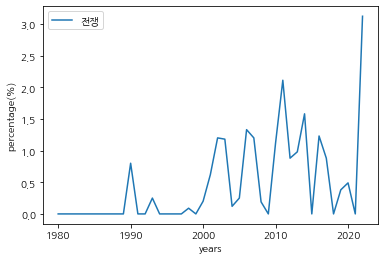

In [68]:
#왕국, 전쟁
#plt.plot(fantasy_word_df.year,fantasy_word_df['왕국'],label = '왕국')
plt.plot(fantasy_word_df.year,fantasy_word_df['전쟁'],label = '전쟁')
plt.xlabel('years')
plt.ylabel('percentage(%)')
plt.legend()
#plt.show()
plt.savefig('fantasy_keyword_war.jpeg',dpi=300)

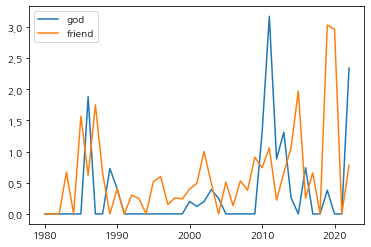

In [57]:
#신, 친구
plt.plot(fantasy_word_df.year,fantasy_word_df['신'],label = '신')
plt.plot(fantasy_word_df.year,fantasy_word_df['친구'],label = '친구')
plt.xlabel('years')
plt.ylabel('percentage(%)')
plt.legend()
plt.show()

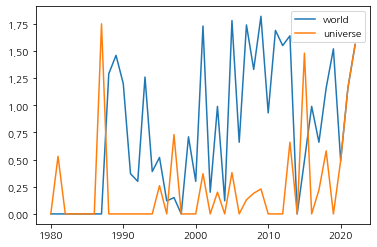

In [58]:
#세계, 우주
plt.plot(fantasy_word_df.year,fantasy_word_df['세계'],label = '세계')
plt.plot(fantasy_word_df.year,fantasy_word_df['우주'],label = '우주')
plt.xlabel('years')
plt.ylabel('percentage(%)')
plt.legend()
plt.show()